# Time Testing


In [1]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def calc_E(M,e=0.0934,n=1000):
    E = M
    for k in range(0,n):
        E = M + e*np.sin(E)
    return E

In [5]:
N_s = 668.6
Ls_peri = 250.99
t_peri = 485.35
a = 1.52368
e = 0.09340
epsilon = 25.1919


sols = np.arange(0,668.6+1)
hrs = np.arange(0,24+1)
sols_and_hrs = np.array([[i+j/24 for j in hrs] for i in sols]).flatten()

In [6]:
D_s = sols_and_hrs
M = 2*np.pi*((D_s-t_peri)/N_s)
E = np.array([calc_E(i) for i in M])
nu = 2*np.arctan((np.sqrt(((1+e)/(1-e)))*np.tan(E/2)))




In [7]:
Ls = np.mod((nu*180/np.pi)+Ls_peri,360)

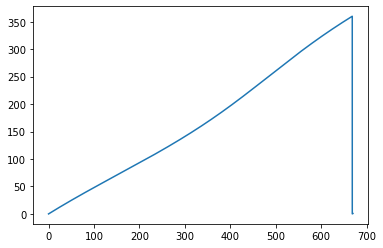

In [8]:
plt.plot(D_s,Ls)

In [9]:

from mcd3 import mcd

In [10]:
scenario = 1
lat = 85
lon = 10
ls = 20
hr = 0

In [11]:
req = mcd()
req.dust = scenario
req.lat = lat
req.lon = lon
req.xdate = ls
req.loct = hr
req.fixedlt = True
req.update()
req.profile()




In [12]:
datavars=[91,93,63,62,57,42,45,44,39,38,32,31,30,33,92,2]
vals = [req.getextvar(var) for var in datavars]



In [13]:
req.lat = lat
req.lon = lon
req.xdate = ls
req.loct = hr
req.fixedlt = True
req.update()
req.profile()
np.clip(np.cos(np.deg2rad(req.getextvar(56)[0])),a_min=0, a_max=None)

0.058800086282857836

In [14]:
from fmcd import solarzenithangle

z = solarzenithangle(lat,ls,hr)
np.clip(np.cos(np.deg2rad(z)),a_min=0, a_max=None)

0.058800086282857836

In [17]:
# for lati in )
lats = np.arange(-90,91,10)
hrss = np.arange(0,24.1,2)
lss = np.arange(0,360,20)

zs = np.zeros((len(lats),len(hrss),len(lss)))

In [18]:
for i in range(0,len(lats)):
    for j in range(0,len(hrss)):
        for k in range(0,len(lss)):
            z = solarzenithangle(lats[i],lss[k],hrss[j])
            zs[i,j,k] = np.clip(np.cos(np.deg2rad(z)),a_min=0, a_max=None)

In [19]:
# zs

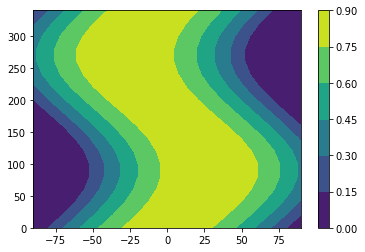

In [30]:
x,y = np.meshgrid(lats,lss)
plt.contourf(x,y,zs[:,5,:].transpose())
plt.colorbar()

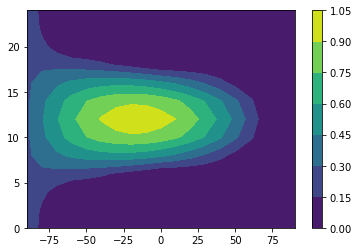

In [11]:

for i in range(0,len(lats)):
    for j in range(0,len(hrss)):
        for k in range(0,len(lss)):
            req.lat = lats[i]
            req.xdate = lss[k]
            req.loct = hrss[j]
            req.fixedlt = True
            req.update()
            req.profile()
            z = np.clip(np.cos(np.deg2rad(req.getextvar(56)[0])),a_min=0, a_max=None)
            zs[i,j,k] = z
            
x,y = np.meshgrid(lats,hrss)
plt.contourf(x,y,zs[:,:,16].transpose())
plt.colorbar()